<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado/blob/main/Trabalho_1_%E2%80%93_Modelos_de_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados *poker-hand-testing* foi extraída de: https://archive-beta.ics.uci.edu/dataset/158/poker+hand
### S = Suits(Naipes) Valores de 1 a 4
### C = Cards(Cartas) Valores de 1 a 13
#### Cartas Maos
   - S1 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C1 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S2 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C2 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S3 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C3 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S4 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C4 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S5 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C5 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
#### Jogadas possiveis   
   - CLASS = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

#### DESCRICAO CLASSES
- 0: Nothing in hand; not a recognized poker hand

- 1: One pair; one pair of equal ranks within five cards

- 2: Two pairs; two pairs of equal ranks within five cards

- 3: Three of a kind; three equal ranks within five cards

- 4: Straight; five cards, sequentially ranked with no gaps

- 5: Flush; five cards with the same suit

- 6: Full house; pair + different rank three of a kind

- 7: Four of a kind; four equal ranks within five cards

- 8: Straight flush; straight + flush

- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [135]:
import pandas as pd
#import sklearn as sk
#import matplotlib as plt
#import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [136]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [137]:
dados.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.470000,7.020000,2.479000,7.082000,2.523000,7.090000,2.547000,6.893000,2.513000,6.915000,0.600000
std,1.149966,3.812629,1.117501,3.757578,1.121931,3.782355,1.122074,3.742935,1.122092,3.696138,0.740641
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,0.000000
50%,2.000000,7.000000,2.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,4.000000,10.250000,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,5.000000


In [138]:
dados.shape

(1000, 11)

In [139]:
# KNN
knn_best_result = []
knn_result = []
# DT - Arvore de descisao 
dt_best_result = []
dt_result = []
# RF - Floresta randomica
rf_best_result = []
rf_result = []
# SVM 
svm_best_result = []
svm_result = []

#KNN
for i in range(1, 51):
  for j in ["uniform","distance"]:
    KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    opiniao = KNN.predict(x_teste)
    pred = KNN.predict(x_teste)
    result = accuracy_score(y_teste, opiniao)
    #print(f"Precisão: {i} - {j} -> ", {result})
    knn_result.append({
        'acc': result,
        'weight': j,
        'kneighbor': i})
#    if result > KNNBestResult:
#      KNNBestResult = result
#      KNNBestPred = pred
#      Kneighbor = i
#      weight = j
print([knn['acc'] for knn in knn_result])
knn_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
knn_best_result = knn_result[-10:] # os 10 melhores resultados

print(f'Melhor resultado:')
for knn in knn_best_result:
    for k, v in knn.items():
        if k == 'kneighbor':
            print(v)
         
print(f'kneighbor - {Kneighbor}')
print(f'weight - {weight}')
print(f'accuracy - {KNNBestResult}')
print(f'result -',knn_result)
#print(f'media- {sum(knn_result)/len(knn_result)}')
# teste = KNeighborsClassifier(n_neighbors=Kneighbor,weights=weight)
# teste.fit(x_treino,y_treino)
# opinionTest = teste.predict(x_teste)
# predTest = teste.predict(x_teste)
# resultTest = accuracy_score(y_teste, opinionTest)
# print(f'Teste com o melhor resultado: {resultTest}')

[0.478, 0.478, 0.538, 0.48, 0.498, 0.492, 0.508, 0.498, 0.508, 0.5, 0.522, 0.496, 0.52, 0.518, 0.526, 0.516, 0.526, 0.508, 0.52, 0.506, 0.516, 0.514, 0.524, 0.518, 0.526, 0.532, 0.544, 0.536, 0.536, 0.536, 0.522, 0.532, 0.544, 0.538, 0.522, 0.528, 0.536, 0.532, 0.522, 0.534, 0.52, 0.54, 0.51, 0.538, 0.522, 0.536, 0.506, 0.53, 0.514, 0.534, 0.506, 0.526, 0.496, 0.52, 0.5, 0.522, 0.494, 0.502, 0.508, 0.502, 0.502, 0.5, 0.5, 0.504, 0.504, 0.506, 0.5, 0.506, 0.514, 0.518, 0.496, 0.518, 0.514, 0.508, 0.5, 0.512, 0.506, 0.5, 0.506, 0.512, 0.52, 0.504, 0.506, 0.514, 0.508, 0.518, 0.494, 0.518, 0.508, 0.516, 0.51, 0.512, 0.52, 0.522, 0.51, 0.524, 0.522, 0.524, 0.524, 0.532]
Melhor resultado:
15
15
19
23
2
17
22
21
14
17
kneighbor - 2
weight - uniform
accuracy - 0.508
result - [{'acc': 0.478, 'weight': 'uniform', 'kneighbor': 1}, {'acc': 0.478, 'weight': 'distance', 'kneighbor': 1}, {'acc': 0.48, 'weight': 'distance', 'kneighbor': 2}, {'acc': 0.492, 'weight': 'distance', 'kneighbor': 3}, {'acc'

In [ ]:
#AD
criterion = ["gini", "entropy"]
max_depth =  7
splitter = "ramdom"
for cr in criterion:
    clf = DecisionTreeClassifier(criterion=cr, splitter=splitter, max_depth=max_depth)
    print(f' criterio: {cr},  clf: {clf}')

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Shared/poker-hand-testing2.csv", sep = ';')
dados = pd.read_csv("poker-hand-testing2.csv", sep=';')
x = dados.iloc[:, :10].values # Cria uma matriz com todos os valores exceto as classes
y = dados['Class'].values     # Cria um array com os valores das classes

# Cria um dataFrame com a matriz de dados com os nomes de todas as colunas exceto a última
df_temp = pd.DataFrame(dados,columns=dados.columns[:-1])
df_temp

In [ ]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
#x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

In [ ]:
# KNN
KNNBestResult = 0
KNNBestPred = []
Kneighbor = 0
weight = ''
knn_result = []

for i in range(1, 11):
  for j in ["uniform","distance"]:
    KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    opiniao = KNN.predict(x_teste)
    pred = KNN.predict(x_teste)
    result = accuracy_score(y_teste, opiniao)
    #print(f"Precisão: {i} - {j} -> ", {result})
    knn_result.append(result)
    if result > KNNBestResult:
      KNNBestResult = result
      KNNBestPred = pred
      Kneighbor = i
      weight = j

print(f'Melhor resultado:')
print(f'kneighbor - {Kneighbor}')
print(f'weight - {weight}')
print(f'accuracy - {KNNBestResult}')
print(f'result -',knn_result)
print(f'media - {sum(knn_result)/len(knn_result)}')
# teste = KNeighborsClassifier(n_neighbors=Kneighbor,weights=weight)
# teste.fit(x_treino,y_treino)
# opinionTest = teste.predict(x_teste)
# predTest = teste.predict(x_teste)
# resultTest = accuracy_score(y_teste, opinionTest)
# print(f'Teste com o melhor resultado: {resultTest}')

/Users/semicheche/Workspace/MLPos/ModelosDeAprendizadoSupervisionado/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/semicheche/Workspace/MLPos/ModelosDeAprendizadoSupervisionado/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/semicheche/Workspace/MLPos/ModelosDeAprendizadoSupervisionado/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

              precision    recall  f1-score   support

           0       0.50      0.74      0.60       254
           1       0.44      0.25      0.32       209
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.48       500
   macro avg       0.16      0.17      0.15       500
weighted avg       0.44      0.48      0.44       500

AUC KNN:  0.5708158263305322
AUC NB:  0.46699929971988796
AUC DT:  0.575280112044818
AUC RF:  0.5753238795518207


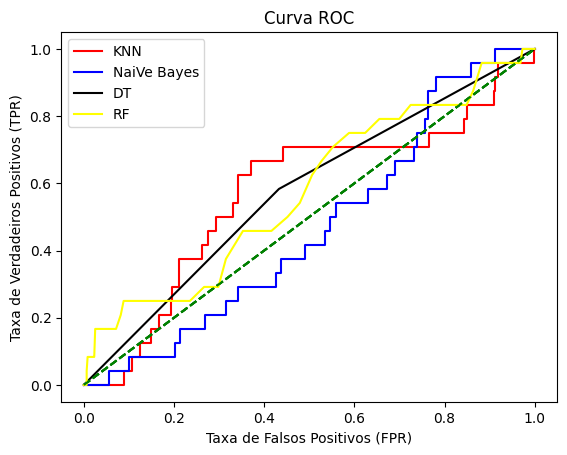

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_teste,KNNBestPred))

confusion_matrix(y_teste,KNNBestPred)
import matplotlib.pyplot as plt

from sklearn import metrics
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    #plt.show()

y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC KNN: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"red","KNN")

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_treino,y_treino)
y_score = NB.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC NB: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")

from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"black","DT")

#from sklearn.svm import SVC  
#SVM = SVC(kernel='linear') 
#SVM.fit(x, y) 

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=2)
RF.fit(x_treino,y_treino)
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"yellow","RF")

plt.show()